### 전력사용량 예측 문제

주어진 데이터를 이용하여, EDA를 하는 문제를 풀어봅니다.
기본과정 과제와 다르게 정답이 정해져 있는 문제는 아닙니다.

분석 니즈에 맞는 코드를 작성하여 여러가지 인사이트를 찾아봅니다.



- Dataset Source : https://dacon.io/competitions/official/236125/data

In [2]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터를 불러옵니다.
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
building_info = pd.read_csv('data/building_info.csv')
print(train.shape, test.shape, building_info.shape)

(204000, 10) (16800, 7) (100, 7)


In [4]:
# window의 한글 폰트 설정
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

### Q1. 주어진 train, test 데이터의 기본정보를 확인하세요.

- 기본정보는 다음과 같습니다.

- row, column 크기
- 사용 메모리 크기

In [5]:
# Q1.
print(train.info()) #shape으로 확인한 train의 행과 열의 크기(201000, 10) 및 memory usage를 알 수 있다.
print(test.info()) #shape으로 확인한 test의 행과 열의 크기(16800, 7) 및 memory usage를 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64

### Q2. train 데이터를 이용해서 시간(x축)에 따른 전력사용량(y축) 변화를 나타내는 그래프를 그리세요.

- sns.lineplot을 추천합니다.

<AxesSubplot:xlabel='일시', ylabel='전력소비량(kWh)'>

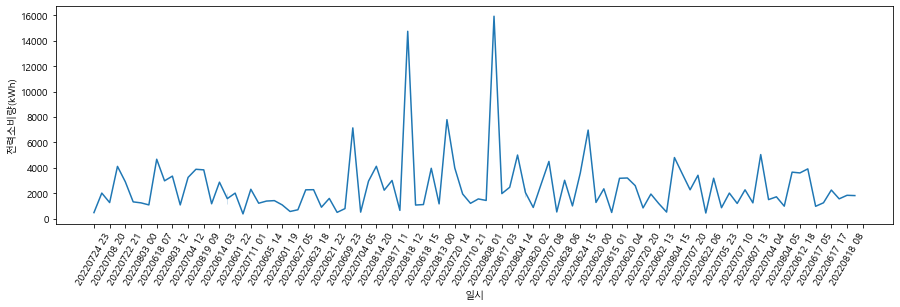

In [6]:
# Q2.
# 샘플링 : train data의 크기가 커서 sample을 추출해 실습하였습니다.
sample_train = train.sample(n=100, random_state=42)
#sample_train : 추출한 sample의 모습을 보기 위함

plt.figure(figsize = (15, 4))
plt.xticks(rotation=60)
plt.xticks(range(0, len(sample_train), 2))
sns.lineplot(data=sample_train, x = "일시", y = "전력소비량(kWh)")

### Q3. building_info에 있는 결측치들은 '-'로 표기되어 있습니다. 해당 값들을 모두 0으로 변환하세요.

- loc를 사용하여 값을 변경할 수 있습니다.

In [7]:
# Q3
building_info_copy = building_info[building_info['건물유형'] == '-'].copy()
building_info_copy['건물유형'] = 0
building_info_copy.isnull().sum() # 0으로 변환되에 결측치가 수정이 되었는지 확인한다.

건물번호            0.0
건물유형            0.0
연면적(m2)         0.0
냉방면적(m2)        0.0
태양광용량(kW)       0.0
ESS저장용량(kWh)    0.0
PCS용량(kW)       0.0
dtype: float64

### Q4. train data와 building_info의 데이터를 병합하세요. 병합 기준은 건물 번호입니다.

- pd.merge 함수를 활용하세요.

In [8]:
# Q4.
# building_info.info()
train_merged = pd.merge(train, building_info, on='건물번호')
train_merged.info() # trian과 building_info가 병합되었는지 확인한다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        203981 non-null  float64
 6   습도(%)          203991 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
 10  건물유형           204000 non-null  object 
 11  연면적(m2)        204000 non-null  float64
 12  냉방면적(m2)       204000 non-null  float64
 13  태양광용량(kW)      204000 non-null  object 
 14  ESS저장용량(kWh)   204000 non-null  object 
 15  PCS용량(kW)      204000 non-null  object 
dtypes: float64(9), int64(1), object(6)
memory usage: 26.5+ MB


#### ---- Q4 이후에 사용하는 모든 train 데이터는 Q4에서 병합된 데이터를 기준으로 합니다. ----

### Q5. 건물유형별 전력사용량 패턴을 그려보세요.

- 패턴을 볼 때는 histplot, scatterplot, lineplot을 주로 사용합니다.

- 사용하기에 적절한 plot을 선택하고 그려보세요.

- 데이터는 loc 또는 groupby를 통해서 묶을 수 있습니다.

<AxesSubplot:xlabel='건물유형', ylabel='전력소비량(kWh)'>

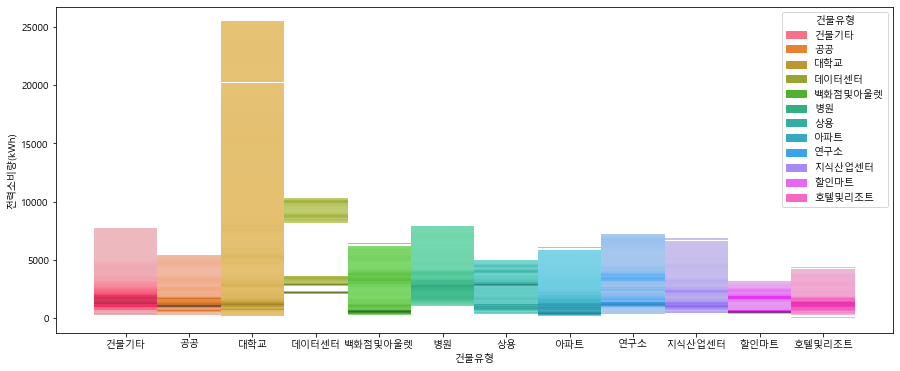

In [9]:
# Q5.
plt.figure(figsize=(15, 6))
sns.histplot(data=train_merged, x='건물유형', y='전력소비량(kWh)', hue='건물유형')

### Q6. train 데이터의 결측치들을 모두 선형 보간법을 이용하여 채우세요.

- pd.Series.interpolate() 를 활용하세요.

In [16]:
# Q6.
#train_merged.isnull().sum()
train_merged_copy = train_merged.copy()
for column in train_merged_copy.columns:
    train_merged_copy[column].interpolate(method='linear', inplace=True)

train_merged_copy.isnull().sum()

num_date_time      0
건물번호               0
일시                 0
기온(C)              0
강수량(mm)          104
풍속(m/s)            0
습도(%)              0
일조(hr)             6
일사(MJ/m2)          6
전력소비량(kWh)         0
건물유형               0
연면적(m2)            0
냉방면적(m2)           0
태양광용량(kW)          0
ESS저장용량(kWh)       0
PCS용량(kW)          0
dtype: int64

In [18]:
# 선형 보간법으로도 채워지지 않는 컬럼은 각각의 평균으로 채워 결측치를 없도록 한다.
train_merged_copy['강수량(mm)'].fillna(train_merged_copy['강수량(mm)'].mean(), inplace=True)
train_merged_copy['일조(hr)'].fillna(train_merged_copy['일조(hr)'].mean(), inplace=True)
train_merged_copy['일사(MJ/m2)'].fillna(train_merged_copy['일사(MJ/m2)'].mean(), inplace=True)

train_merged_copy.isnull().sum()

num_date_time    0
건물번호             0
일시               0
기온(C)            0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
일조(hr)           0
일사(MJ/m2)        0
전력소비량(kWh)       0
건물유형             0
연면적(m2)          0
냉방면적(m2)         0
태양광용량(kW)        0
ESS저장용량(kWh)     0
PCS용량(kW)        0
dtype: int64

### Q7. train data의 상관계수 행렬을 출력하세요.

- 상관계수 행렬 자체(dataframe)과 해당 행렬을 heatmap으로 표현해보세요.

                건물번호     기온(C)   강수량(mm)   풍속(m/s)     습도(%)    일조(hr)  \
건물번호        1.000000 -0.004505 -0.006815  0.021461  0.022994  0.020159   
기온(C)      -0.004505  1.000000 -0.033640  0.220236 -0.389888  0.402421   
강수량(mm)    -0.006815 -0.033640  1.000000  0.006443  0.172479 -0.069344   
풍속(m/s)     0.021461  0.220236  0.006443  1.000000 -0.219109  0.160476   
습도(%)       0.022994 -0.389888  0.172479 -0.219109  1.000000 -0.577227   
일조(hr)      0.020159  0.402421 -0.069344  0.160476 -0.577227  1.000000   
일사(MJ/m2)  -0.009702  0.461155 -0.077227  0.222879 -0.561756  0.754290   
전력소비량(kWh) -0.180474  0.171190  0.005995  0.109956 -0.129549  0.090538   
연면적(m2)    -0.115322 -0.003338  0.051613 -0.055011 -0.020119  0.002420   
냉방면적(m2)   -0.116199 -0.003055  0.051499 -0.053790 -0.020519  0.002717   

            일사(MJ/m2)  전력소비량(kWh)   연면적(m2)  냉방면적(m2)  
건물번호        -0.009702   -0.180474 -0.115322 -0.116199  
기온(C)        0.461155    0.171190 -0.003338 -0.003055  
강수량(mm)     -0.07

<AxesSubplot:>

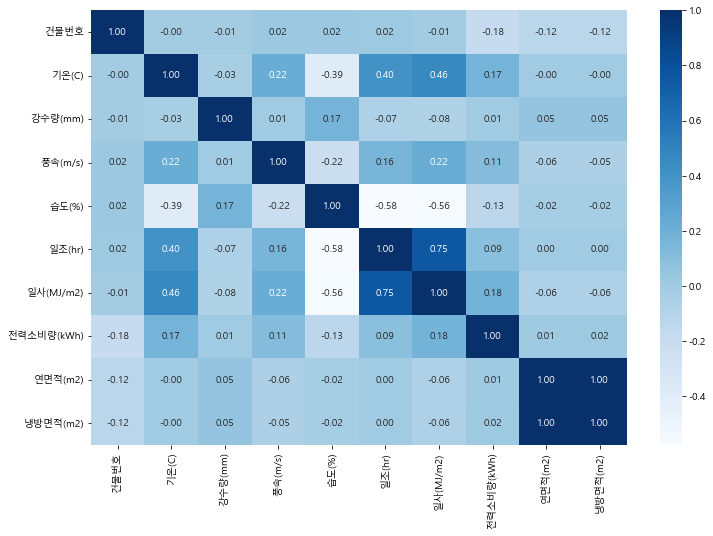

In [23]:
# Q7.
correlation_matrix = train_merged_copy.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = "Blues", fmt=".2f")